In [182]:
# 컬럼들에 대해서 이해한 후

# 어떠한 것이 survived에 영향을 미치겠는가

# 기존에 있는 컬럼들로 가지고 더 의미있는 새로운 파생변수를 만들 수 있음.
# 동반한 형제잠, 배우자 수 와 동반한 부모, 자식 수 를 따로 볼 것인지 아니면 합쳐서 하나의 familly라는 파생변수를 만들 것인지

# 생존에 영향을 미치지 않는 승객 이름은 삭제
# 중복되는 데이터는 삭제
# 결측치 처리, 널값이 있다고 해서 무조건 지우지 않음. 따져봐야 함. 널값이 많다고 삭제하면 다른 컬럼에 있는 행의 값들도 날라가기 때문에 
# 어떻게 대체해줄지도 생각

# 문자로 되어있는 것은 알고리즘에 넣을 때 오류가 뜨기 때문에 더미변수로 원핫인코딩.

### Titanic3
생존자 예측 모델 개발을 위한 분석 셋
과제
: 타이타닉 생존자 예측모델 개발을 위한 전처리 및 통계적 시각적 탐색을 통하여 최적의 분석용 데이터셋을 작성하세요.



### Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
- Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
- 불필요한 속성 칼럼 삭제
- 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수
- 컬럼 정보
- survived : 생존여부(1: 생존, 0 : 사망)
- pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동반한 형제자매, 배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat: 탈출한 보트번호 
- body: 사망자 번호 
- home.dest: 고향, 목적지 

In [183]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [184]:
# df = pd.read.csv("../dataset/titanic3.csv")
# read_csv 임

df = pd.read_csv('C:\hmkd1\m2_분석라이브러리\dataset/titanic3.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [185]:
# 분석용 데이터셋 저장

df.to_pickle('C:\hmkd1\m2_분석라이브러리\dataset/tt3.pkl')
df = pd.read_pickle('C:\hmkd1\m2_분석라이브러리\dataset/tt3.pkl')

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [186]:
df.isnull().sum()


# 총 1309 데이터에

#### 문자
# 이름                                                삭제
# 성별                                                나중에 인코딩 0 남자 1여자
# age                                                 결측치 어떻게 처리할까
# sibsp 동반한 형제자매, 배우자 수
# parch 동반한 부모, 자식 수                           
# ticket 티켓의 고유넘버                              삭제? 
# fare 티켓의 요금
# cabin 객실번호     필요한가?                        결측치 1014     보류
# embarked 승선한 항구명         c:셰르부르 프랑스 q:퀸스타운 뉴질랜드 s :사우샘프턴 잉글랜드  
# boat  탈출한 보트번호                               삭제
# body 사망자 번호                                    삭제
# home.dest 고향, 목적지                              삭제

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [187]:
# body','ticket', 'home.dest','boat', 'name' 열 삭제

df.drop(['body','ticket', 'home.dest','boat', 'name'], axis = 1, inplace = True)

In [188]:
# family: sibsp + parch 동승한 가족들 수
# df[family] = df[sibsp] + df[parch]    꼭 "" !!!!

df['family'] = df['sibsp'] + df['parch']

In [189]:
## 결측치 처리

# 항구 embarked 2개 가장 많이 나온 값으로 변경

s = df['embarked'].value_counts(dropna=True).idxmax()     # 각각 축에서 최대/최소 값의 인덱스를 반환하는 메서드
df['embarked'].fillna(s,inplace =True)

#################################

# fare 열 결측치 평균값으로 치환
df['fare'].replace(np.nan,df['fare'].mean(),inplace=True )

In [190]:
df.isnull().sum()

pclass         0
survived       0
sex            0
age          263
sibsp          0
parch          0
fare           0
cabin       1014
embarked       0
family         0
dtype: int64

In [191]:
df.age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [192]:
## age: nan값 처리,     21~39 에서 랜덤 중위값

df['age'].replace(np.nan, 30, inplace=True)

<AxesSubplot:ylabel='Frequency'>

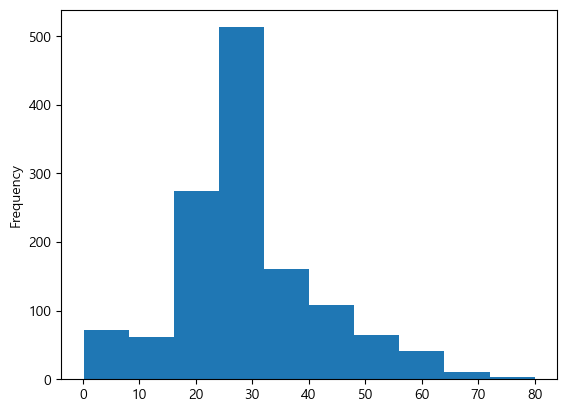

In [193]:
df.age.plot(kind='hist')

In [194]:
## 나이 범주화
def get_age(age):
    cat = ''
    if age < 5: cat='Baby'
    elif age < 15: cat= 'Child'
    elif age < 21: cat= 'Young Adult'
    elif age < 49: cat='Adult'
    elif age < 70: cat='Old'
    else: cat = 'Elder'
    return cat

###################################################

df['age_cat'] = df.age.apply(lambda x: get_age(x))

In [195]:
## 가격 범주화

def get_cat(fare):
    cat = ''
    if fare <= 15: cat = '저가'
    elif fare <= 60: cat = '중가'
    elif fare <= 200: cat = '고가'
    else: cat = '프리미엄'
    return cat

#####################################

df['fare_cat'] = df.fare.apply(lambda x: get_cat(x))

####################################
# 각 갯수를 나타내기

df['fare_cat'].value_counts()

저가      673
중가      452
고가      146
프리미엄     38
Name: fare_cat, dtype: int64

In [196]:
## 객실 구역 나누기

df['cabin'].replace(np.nan,'X',inplace = True)     # 넌값을 x로 두겠다. 왜냐면 모를 수 밖에. 사람이 죽었으니까 파악이 안돼죠
#############################################


idx1 = df['cabin'].str.contains('A')      # idx1에 A를 포함한 객실들을 넣겠다
df['cabin'][idx1] = 'A'                   # A를 포함한 객실들에 A를 넣겠다.
idx1 = df['cabin'].str.contains('B')    
df['cabin'][idx1] = 'B'
idx1 = df['cabin'].str.contains('C')    
df['cabin'][idx1] = 'C'
idx1 = df['cabin'].str.contains('D')    
df['cabin'][idx1] = 'D'
idx1 = df['cabin'].str.contains('E')    
df['cabin'][idx1] = 'E'
idx1 = df['cabin'].str.contains('F')    
df['cabin'][idx1] = 'F'

In [197]:
## 원핫 인코딩

# 원핫 인코딩: 승선 항구
df = pd.get_dummies(df, columns=['embarked'])

# 원핫 인코딩: 성별
df = pd.get_dummies(df, columns=['sex'])

# 원핫 인코딩: 객실
df = pd.get_dummies(df, columns=['cabin'])

# 원핫 인코딩: 요금 범주화
df = pd.get_dummies(df, columns=['fare_cat'])

# 원핫 인코딩: 나이 범주화
df = pd.get_dummies(df, columns=['age_cat'])

In [198]:
df.head()

,pclass,survived,age,sibsp,parch,fare,family,embarked_C,embarked_Q,embarked_S,...,fare_cat_고가,fare_cat_저가,fare_cat_중가,fare_cat_프리미엄,age_cat_Adult,age_cat_Baby,age_cat_Child,age_cat_Elder,age_cat_Old,age_cat_Young Adult
0,1,1,29.00,0,0,211.3375,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,1,1,0.92,1,2,151.5500,3,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,1,0,2.00,1,2,151.5500,3,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,1,0,30.00,1,2,151.5500,3,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,0,25.00,1,2,151.5500,3,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [199]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = df['survived'] # 종속변수
X_t_df = df.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)

(1047, 30)
(262, 30)


In [200]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.78, lr 정확도:0.82


In [201]:
# #### 뽑기  Miss Master Mrs Mr

# df_Miss = (~df['name'].str.contains('Mr'))     Mr 제외하고 뽑기


# df_Miss = df[df['name'].str.contains(',Mr')] Mr 들어가있는 데이터 뽑기
# df_Miss


In [202]:
# 나이대 별로 생존여부
# 클래스에 따른 생존여부
# 남,여 간의 생존여부
# 

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pclass               1309 non-null   int64  
 1   survived             1309 non-null   int64  
 2   age                  1309 non-null   float64
 3   sibsp                1309 non-null   int64  
 4   parch                1309 non-null   int64  
 5   fare                 1309 non-null   float64
 6   family               1309 non-null   int64  
 7   embarked_C           1309 non-null   uint8  
 8   embarked_Q           1309 non-null   uint8  
 9   embarked_S           1309 non-null   uint8  
 10  sex_female           1309 non-null   uint8  
 11  sex_male             1309 non-null   uint8  
 12  cabin_A              1309 non-null   uint8  
 13  cabin_B              1309 non-null   uint8  
 14  cabin_C              1309 non-null   uint8  
 15  cabin_D              1309 non-null   u